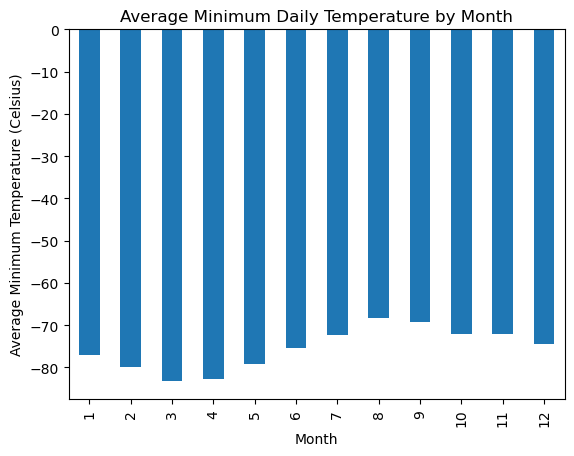

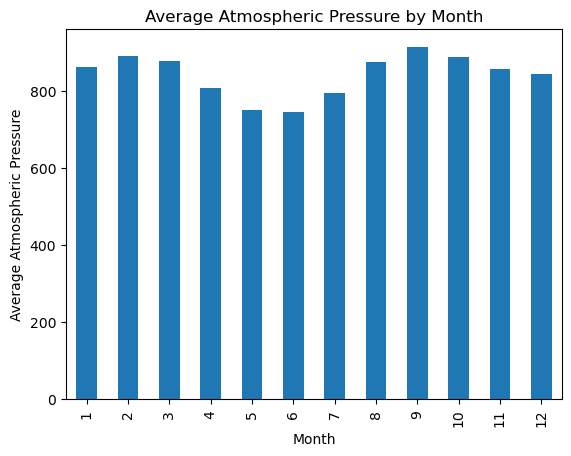

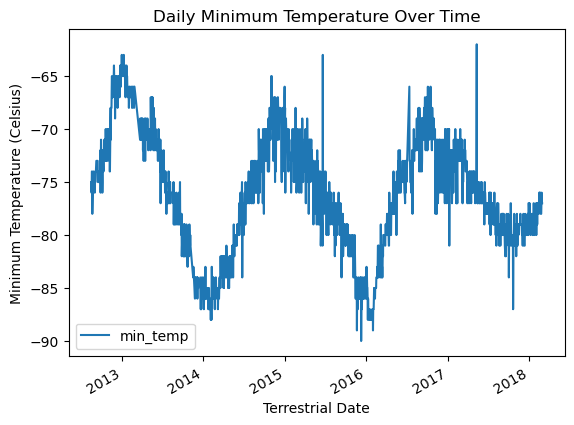

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the Mars Temperature Data site
url_temperature = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Send a GET request to the URL
response_temperature = requests.get(url_temperature)

# Check if the request was successful (status code 200)
if response_temperature.status_code == 200:
    # Parse the HTML content of the page
    soup_temperature = BeautifulSoup(response_temperature.text, 'html.parser')
    
    # Find HTML table containing temperature data
    table_temperature = soup_temperature.find('table')
    
    # Use Pandas to read the HTML table into a DataFrame
    df_temperature = pd.read_html(str(table_temperature))[0]
    
    # Examine the data types and convert if necessary
    df_temperature['terrestrial_date'] = pd.to_datetime(df_temperature['terrestrial_date'])
    # Convert other columns if needed
    
    # Add 'id' column
    df_temperature['id'] = range(1, len(df_temperature) + 1)
    
    # Answering questions:
    
    # How many months exist on Mars?
    num_months = df_temperature['month'].nunique()
    
    # How many Martian days worth of data exist in the scraped dataset?
    num_martian_days = df_temperature['sol'].nunique()
    
    # What are the coldest and the warmest months on Mars (at the location of Curiosity)?
    # Find the average minimum daily temperature for all of the months
    avg_min_temp_by_month = df_temperature.groupby('month')['min_temp'].mean()
    
    # Plot the results as a bar chart
    avg_min_temp_by_month.plot(kind='bar', title='Average Minimum Daily Temperature by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Minimum Temperature (Celsius)')
    plt.show()

    # Which months have the lowest and the highest atmospheric pressure on Mars?
    # Find the average daily atmospheric pressure of all the months
    avg_pressure_by_month = df_temperature.groupby('month')['pressure'].mean()
    
    # Plot the results as a bar chart
    avg_pressure_by_month.plot(kind='bar', title='Average Atmospheric Pressure by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Atmospheric Pressure')
    plt.show()

    # About how many terrestrial (Earth) days exist in a Martian year?
    # Visually estimate the result by plotting the daily minimum temperature
    df_temperature.plot(x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature Over Time')
    plt.xlabel('Terrestrial Date')
    plt.ylabel('Minimum Temperature (Celsius)')
    plt.show()

    # Export the DataFrame to a CSV file
    df_temperature.to_csv('mars_weather_data.csv', index=False)

else:
    print(f"Error: Unable to fetch the webpage. Status code: {response_temperature.status_code}")
